In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение (Версия для Python 3)

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [2]:
sample = np.random.choice([1,2,3,4,5,6], 100)

In [3]:
sample

array([3, 1, 6, 1, 5, 5, 2, 2, 5, 6, 3, 6, 6, 1, 3, 1, 5, 4, 2, 1, 5, 2,
       1, 1, 2, 4, 2, 5, 1, 2, 2, 6, 1, 2, 4, 4, 4, 5, 2, 5, 5, 6, 5, 5,
       1, 5, 4, 3, 2, 3, 2, 3, 5, 2, 5, 3, 1, 2, 1, 3, 5, 4, 4, 3, 1, 4,
       5, 1, 6, 2, 3, 1, 6, 6, 3, 3, 2, 3, 1, 6, 3, 5, 1, 6, 3, 4, 6, 2,
       5, 4, 6, 5, 3, 2, 2, 5, 2, 1, 1, 1])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [5]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({1: 20, 5: 20, 2: 20, 3: 16, 6: 13, 4: 11})
Вероятности выпадений каждой из сторон:
{3: 0.16, 1: 0.2, 6: 0.13, 5: 0.2, 2: 0.2, 4: 0.11}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [1]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

NameError: name 'sts' is not defined

Эмпирическая функция распределения для полученной выборки:

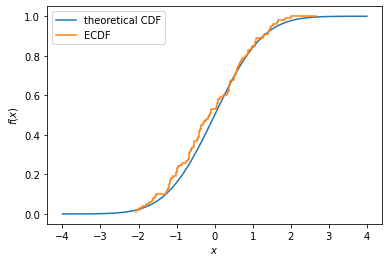

In [8]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5, 0, '$x$')

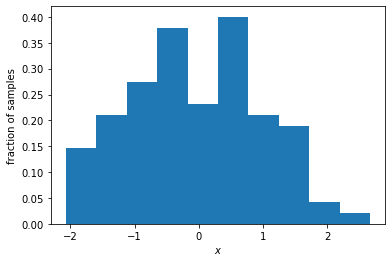

In [9]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

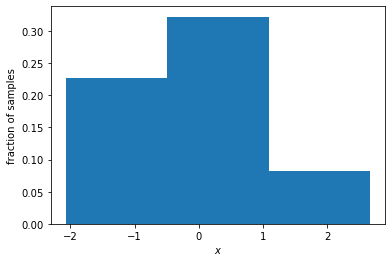

In [10]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

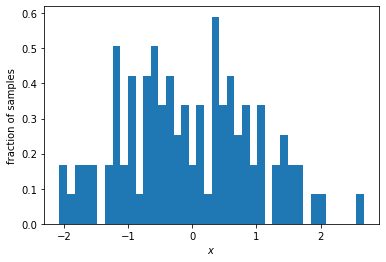

In [11]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

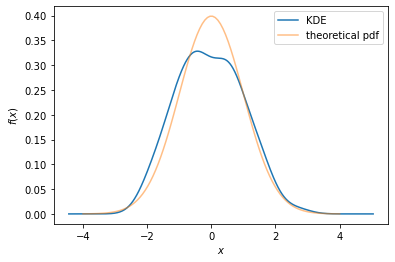

In [12]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')